<a href="https://colab.research.google.com/github/Luciahelenasantos/POS_GRADUACAO_PUC/blob/main/MVP/Projeto_Split1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aluna : Lucia Helena Barros dos Santos

# Descrição do Problema: 

# Objetivo: 

 
## Dicionário de dados:

##### - **Identificacao:** Chave de identificação do registro no banco original
##### - **Data:** Data e horário de medição do poluente pela estação
##### - **Estacao:** Sigla da estação meteorológica Irajá (IR)

---

#### *Poluentes medidos pela Estação meteorológica IR*
##### - **Chuva:** Volume de Chuva medida em milímetro (mm)
##### - **Pres:** 
##### - **RS:** Radiação Solar medida em milímetro (mm)
##### - **Temp:** Temperatura medida em graus Celcius (°C)
##### - **UR:** Umidade Relativa medida em percentual (%)
##### - **Dir_Vento:** Direção do Vento medido em graus (°)
##### - **Vel_Vento:** Umidade Relativa medida em percentual (%)
##### - **SO2:** Dióxido de Exofre medido em Micrograma por Metro Cúbico (µg/m3) 
##### - **NO2:** Dióxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **HCT:** Hidrocarboneto Total medido em partes por milhão (ppm)
##### - **CH4:** Metano medido em partes por milhão (ppm)
##### - **CO:** Monóxido de Carbono Metano medido em partes por milhão (ppm)
##### - **NO:** Monóxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **NOx:** Óxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **O3:** Ozônio medido Micrograma medido em Metro Cúbico (µg/m3) 
##### - **PM10:** Material Particulado <10 medido em Metro Cúbico (µg/m3)
##### - **PM2_5:** Material Particulado <2_5 medido em Metro Cúbico (µg/m3)


## Importando bibliotecas 

In [1]:
# Importação brbliotecas necessárias

import pandas as pd
import os # para o retorno do caminho dos dados - 'os.chdir'
import datetime # para o tratamento de datas
import missingno as ms # para tratamento de missings
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt # biblioteca para criação de gráficos
from google.colab import drive # acesso ao drive do google Colab - 'drive.mount'
from google.colab import data_table # para melhor apresentação da tabela
from datetime import date, datetime # para conversão de datas

# ***1 - Etapa de Análise Exploratória dos dados***

## 1.1 - Carregando do Banco de dados

In [2]:
# Apontando para My Drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


In [3]:
# Importando o arqquivo em formato csv hospedado em My Drive

dadoarIR = pd.read_csv('dados/EstacaoIR20122021.csv', delimiter = ';')

In [4]:
# Verificando que o banco é um Dataframe

type(dadoarIR)

pandas.core.frame.DataFrame

In [5]:
# Verificando a estrutura do Datatrame observo que o atributo Data está em 
# formato str, necessitnado assim de um transformação de formato str para date

dadoarIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79863 entries, 0 to 79862
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Identificacao  79863 non-null  int64  
 1   Data           79863 non-null  object 
 2   Estacao        79863 non-null  object 
 3   Chuva          79394 non-null  float64
 4   Pres           78617 non-null  float64
 5   RS             68397 non-null  float64
 6   Temp           69942 non-null  float64
 7   UR             63458 non-null  float64
 8   Dir_Vento      66399 non-null  float64
 9   Vel_Vento      66401 non-null  float64
 10  SO2            63167 non-null  float64
 11  NO2            73931 non-null  float64
 12  HCNM           67060 non-null  float64
 13  HCT            66986 non-null  float64
 14  CH4            67061 non-null  float64
 15  CO             72352 non-null  float64
 16  NO             73918 non-null  float64
 17  NOx            73927 non-null  float64
 18  O3    

In [6]:
# Observando as 5 primeiras linhas do Datafram

dadoarIR.head()

,Identificacao,Data,Estacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,...,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
0,223917,2012/01/01 00:30:00+00,IR,0.8,1003.43,0.83,24.84,97.12,NaN,NaN,...,20.09,0.68,2.52,1.83,0.40,0.23,20.20,25.03,89.0,85.0
1,223918,2012/01/01 01:30:00+00,IR,0.0,1002.43,1.00,24.68,96.00,NaN,NaN,...,18.91,0.65,2.55,1.90,0.35,0.68,19.60,22.95,33.0,32.0
2,223919,2012/01/01 02:30:00+00,IR,0.0,1001.62,1.00,24.56,96.39,NaN,NaN,...,17.99,0.66,2.58,1.92,0.34,0.39,18.33,22.31,19.0,14.0
3,223920,2012/01/01 03:30:00+00,IR,0.0,1001.10,1.00,24.65,96.87,NaN,NaN,...,22.49,0.69,2.59,1.90,0.37,0.44,22.93,17.98,12.0,12.0
4,223921,2012/01/01 04:30:00+00,IR,0.0,1000.85,1.00,24.66,96.32,NaN,NaN,...,21.28,0.68,2.60,1.91,0.32,0.24,21.52,18.88,10.0,10.0


## 1.2 - Análse descritiva dos dados

In [7]:
# apenas os atributos que representam medição da estação

dadoarIR_Medidas = dadoarIR[['Identificacao','Chuva','Pres','RS','Temp','UR','Dir_Vento',
                             'Vel_Vento','SO2','NO2','HCNM','HCT','CH4',
                             'CO','NO','NOx','O3','PM10','PM2_5']]

In [8]:
#fazer o describe

# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dadoarIR_Medidas.describe()

,Identificacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
count,79863.000000,79394.000000,78617.000000,68397.000000,69942.000000,63458.000000,66399.000000,66401.000000,63167.000000,73931.000000,67060.000000,66986.000000,67061.000000,72352.000000,73918.000000,73927.000000,73722.000000,76108.000000,71421.000000
mean,359485.039618,0.134650,1015.435727,172.533981,27.448996,68.326379,158.175101,1.189656,4.089263,39.718879,0.130195,2.208526,2.079119,0.448970,18.413329,58.099434,35.123128,37.263661,17.317909
std,153056.361705,1.218307,4.985593,263.120389,4.865654,18.957895,82.200564,0.754830,6.849701,20.668641,0.129975,0.479669,0.399875,0.290624,34.183769,47.335670,33.879136,23.913806,14.699718
min,223917.000000,0.000000,998.800000,0.000000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243882.500000,0.000000,1011.970000,0.000000,23.880000,54.550000,83.500000,0.680000,0.580000,24.990000,0.060000,1.940000,1.860000,0.280000,3.220000,29.740000,9.150000,22.000000,8.000000
50%,263848.000000,0.000000,1015.070000,5.830000,26.750000,70.095000,150.830000,0.980000,2.510000,36.320000,0.100000,2.090000,1.980000,0.390000,7.140000,44.930000,26.320000,32.000000,13.000000
75%,503444.500000,0.000000,1018.670000,283.000000,30.370000,82.730000,226.830000,1.450000,5.150000,50.150000,0.160000,2.320000,2.170000,0.540000,17.840000,70.330000,50.490000,47.000000,23.000000
max,642177.000000,88.000000,1033.750000,1752.670000,45.650000,100.000000,358.830000,6.480000,309.130000,211.810000,7.530000,13.010000,12.730000,4.620000,640.380000,702.670000,355.450000,409.000000,370.000000


In [ ]:
#fazer os gráficos

# ***2 - Etapa de Pré Processamento***


## 2.1 - Tratando o Banco de dados 

In [ ]:
# Alterando o atributo Data de str para formato data

dadoarIR['Data'] = pd.to_datetime(dadoarIR['Data'])

In [ ]:
# Confirmando que a transformação foi feita com sucesso 
# na variável Data de str para date

dadoarIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79863 entries, 0 to 79862
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Identificacao  79863 non-null  int64              
 1   Data           79863 non-null  datetime64[ns, UTC]
 2   Estacao        79863 non-null  object             
 3   Chuva          79394 non-null  float64            
 4   Pres           78617 non-null  float64            
 5   RS             68397 non-null  float64            
 6   Temp           69942 non-null  float64            
 7   UR             63458 non-null  float64            
 8   Dir_Vento      66399 non-null  float64            
 9   Vel_Vento      66401 non-null  float64            
 10  SO2            63167 non-null  float64            
 11  NO2            73931 non-null  float64            
 12  HCNM           67060 non-null  float64            
 13  HCT            66986 non-null  float64        

In [ ]:
# Criando os campos ano, mês e dia que servirão de filtros
# Acessando os atributos da Data

dadoarIR['Ano'] = dadoarIR['Data'].dt.year
dadoarIR['Mes'] = dadoarIR['Data'].dt.month
dadoarIR['Dia'] = dadoarIR['Data'].dt.day
dadoarIR['Hora'] = dadoarIR['Data'].dt.hour
dadoarIR['Data_dt'] = dadoarIR['Data'].dt.date
dadoarIR['Data_dt'] = pd.to_datetime(dadoarIR['Data_dt'])

In [ ]:
# Função que cria variável "estacao_ano" para identificar as estações climáticas

def calcula_estacao_ano(dt):
  vdia = dt.day
  vmes = dt.month

  if ((vdia >= 20) and (vmes >= 3)) and  ((vdia <= 20) and (vmes <= 6)) :
    return "Outono"
  elif (vdia >= 21 and vmes >= 6) and (vdia <= 21 and vmes <= 9): 
    return "Inverno"
  elif (vdia >= 22 and vmes >= 9) and (vdia <= 21 and vmes <= 12):   
    return "Primavera"
  else: 
    return "Verão"  
      
dadoarIR["estacao_ano"] = dadoarIR["Data"].apply(calcula_estacao_ano)   

In [ ]:
verifica_estacao_ano = dadoarIR[['Ano','Mes','Dia','estacao_ano']]
verifica_estacao_ano

,Ano,Mes,Dia,estacao_ano
0,2012,1,1,Verão
1,2012,1,1,Verão
2,2012,1,1,Verão
3,2012,1,1,Verão
4,2012,1,1,Verão
...,...,...,...,...
79858,2021,3,31,Verão
79859,2021,3,31,Verão
79860,2021,3,31,Verão
79861,2021,3,31,Verão


In [ ]:
# Função que cria variável "periodo_dia" para identificar manhã, tarde ou noite

def calcula_periodo_dia(hora):
  vhora = hora

  if vhora < 12:
    return "Manhã"
  if vhora < 18:
    return "Tarde"  
  else: 
    return "Noite"

dadoarIR["periodo_dia"] = dadoarIR["Hora"].apply(calcula_periodo_dia)  

In [ ]:
# Comando pd.set_option permite aumentar a quantidade de colunas apresentadas

pd.set_option('display.max_columns', None)
dadoarIR

,Identificacao,Data,Estacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5,Ano,Mes,Dia,Hora,Data_dt,estacao_ano,periodo_dia
0,223917,2012-01-01 00:30:00+00:00,IR,0.8,1003.43,0.83,24.84,97.12,NaN,NaN,2.55,20.09,0.68,2.52,1.83,0.40,0.23,20.20,25.03,89.0,85.0,2012,1,1,0,2012-01-01,Verão,Manhã
1,223918,2012-01-01 01:30:00+00:00,IR,0.0,1002.43,1.00,24.68,96.00,NaN,NaN,0.45,18.91,0.65,2.55,1.90,0.35,0.68,19.60,22.95,33.0,32.0,2012,1,1,1,2012-01-01,Verão,Manhã
2,223919,2012-01-01 02:30:00+00:00,IR,0.0,1001.62,1.00,24.56,96.39,NaN,NaN,0.11,17.99,0.66,2.58,1.92,0.34,0.39,18.33,22.31,19.0,14.0,2012,1,1,2,2012-01-01,Verão,Manhã
3,223920,2012-01-01 03:30:00+00:00,IR,0.0,1001.10,1.00,24.65,96.87,NaN,NaN,0.70,22.49,0.69,2.59,1.90,0.37,0.44,22.93,17.98,12.0,12.0,2012,1,1,3,2012-01-01,Verão,Manhã
4,223921,2012-01-01 04:30:00+00:00,IR,0.0,1000.85,1.00,24.66,96.32,NaN,NaN,0.79,21.28,0.68,2.60,1.91,0.32,0.24,21.52,18.88,10.0,10.0,2012,1,1,4,2012-01-01,Verão,Manhã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79858,642173,2021-03-31 19:30:00+00:00,IR,0.0,1009.12,6.00,26.98,60.72,226.50,1.20,11.11,30.38,0.04,2.14,2.10,NaN,7.94,38.32,17.04,29.0,0.0,2021,3,31,19,2021-03-31,Verão,Noite
79859,642174,2021-03-31 20:30:00+00:00,IR,0.0,1009.95,6.17,26.82,60.65,227.17,1.25,12.12,28.38,0.02,2.08,2.05,NaN,6.71,35.09,18.76,28.0,2.0,2021,3,31,20,2021-03-31,Verão,Noite
79860,642175,2021-03-31 21:30:00+00:00,IR,0.0,1010.40,6.00,26.70,60.43,249.50,0.85,11.12,24.53,0.11,2.50,2.39,NaN,5.05,29.58,21.30,26.0,7.0,2021,3,31,21,2021-03-31,Verão,Noite
79861,642176,2021-03-31 22:30:00+00:00,IR,1.8,1010.33,6.00,25.80,71.95,299.17,1.15,11.26,28.75,0.03,2.09,2.06,NaN,4.19,32.94,17.11,30.0,11.0,2021,3,31,22,2021-03-31,Verão,Noite


## 2.2 - Verificando missing

In [ ]:
# verificando nulls - valores faltantes no dataset

dadoarIR.isnull().sum()

Identificacao        0
Data                 0
Estacao              0
Chuva              469
Pres              1246
RS               11466
Temp              9921
UR               16405
Dir_Vento        13464
Vel_Vento        13462
SO2              16696
NO2               5932
HCNM             12803
HCT              12877
CH4              12802
CO                7511
NO                5945
NOx               5936
O3                6141
PM10              3755
PM2_5             8442
Ano                  0
Mes                  0
Dia                  0
Hora                 0
Data_dt              0
estacao_ano          0
periodo_dia          0
dtype: int64

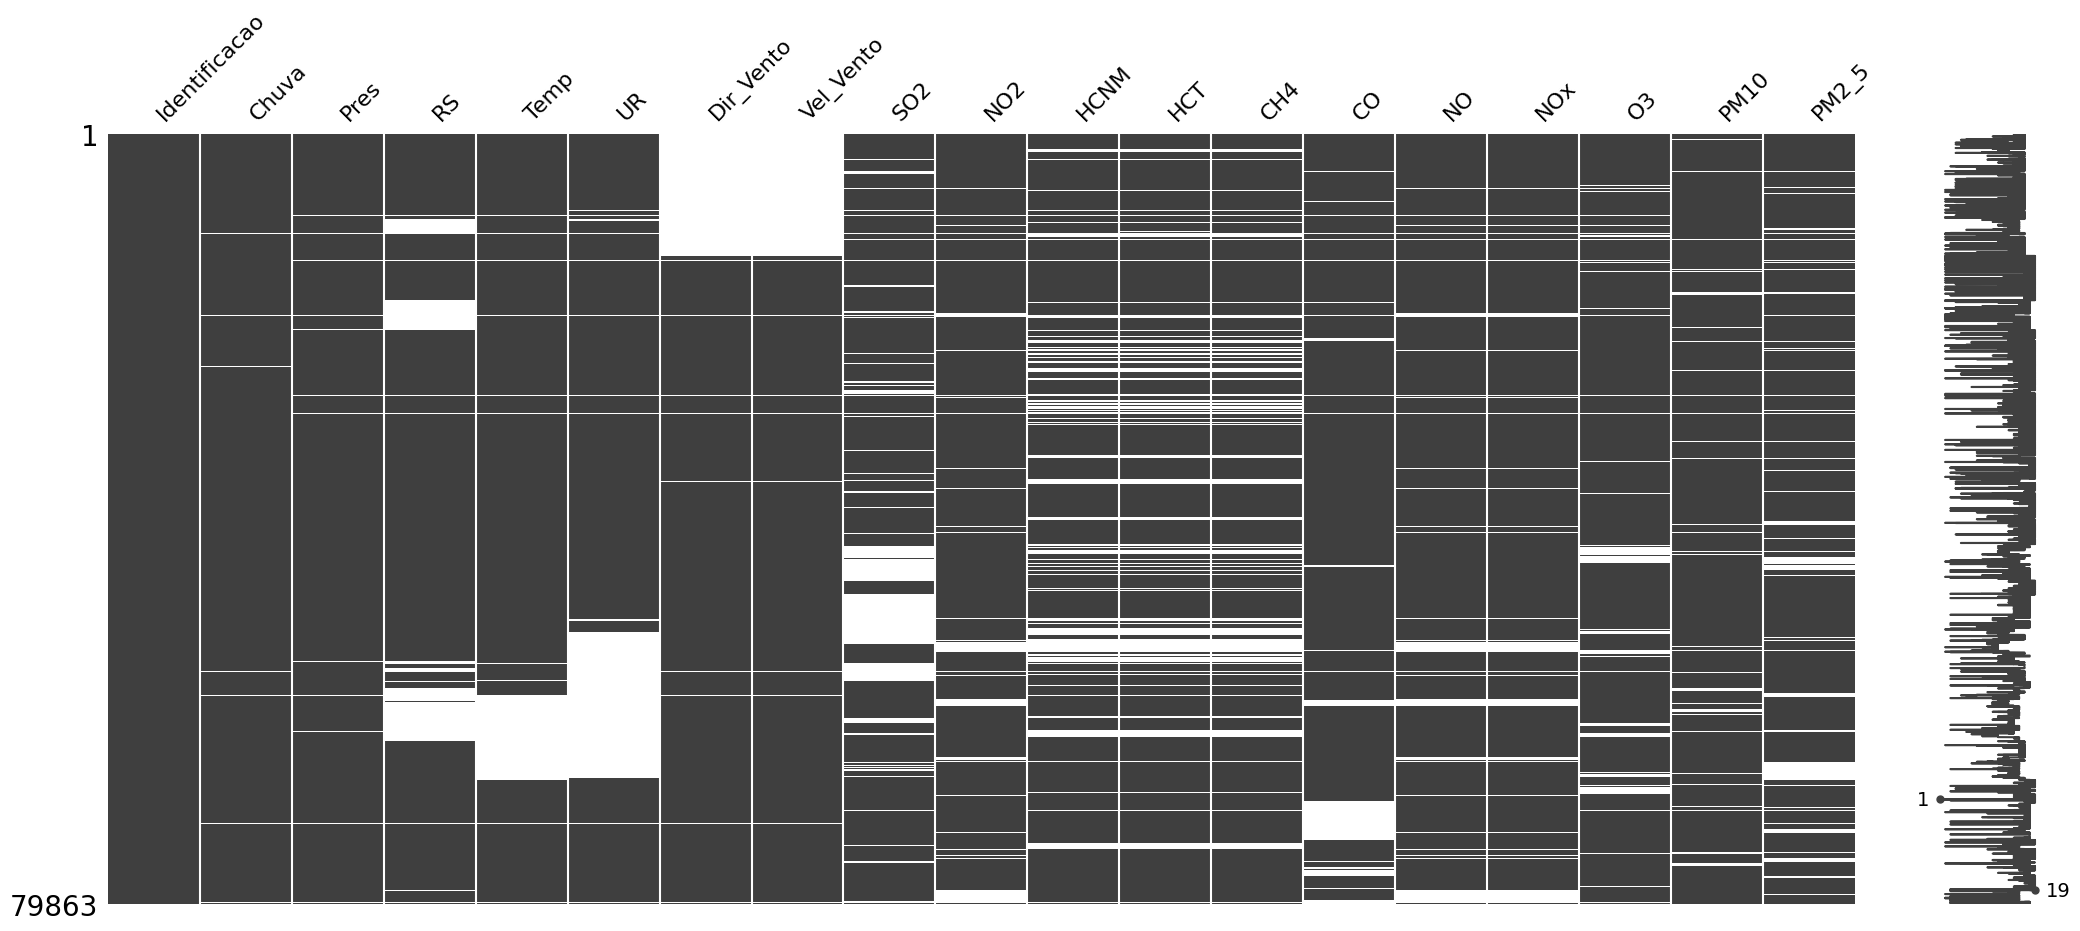

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dadoarIR.columns)

# o novo dataset irá conter todas as colunas do dataset original
dadoarIRSemMissings = dadoarIR[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dadoarIRsemMissing);

In [ ]:
# substituindo os atributos com valores faltantes pelo valor zero

dadoarIRSemMissings['Chuva'].fillna(0, inplace=True)
dadoarIRSemMissings['Pres'].fillna(0, inplace=True)
dadoarIRSemMissings['RS'].fillna(0, inplace=True)
dadoarIRSemMissings['Temp'].fillna(0, inplace=True)
dadoarIRSemMissings['UR'].fillna(0, inplace=True)
dadoarIRSemMissings['Dir_Vento'].fillna(0, inplace=True)
dadoarIRSemMissings['Vel_Vento'].fillna(0, inplace=True)
dadoarIRSemMissings['SO2'].fillna(0, inplace=True)
dadoarIRSemMissings['NO2'].fillna(0, inplace=True)
dadoarIRSemMissings['HCNM'].fillna(0, inplace=True)
dadoarIRSemMissings['HCT'].fillna(0, inplace=True)
dadoarIRSemMissings['CH4'].fillna(0, inplace=True)
dadoarIRSemMissings['CO'].fillna(0, inplace=True)
dadoarIRSemMissings['NO'].fillna(0, inplace=True)
dadoarIRSemMissings['NOx'].fillna(0, inplace=True)
dadoarIRSemMissings['O3'].fillna(0, inplace=True)
dadoarIRSemMissings['PM10'].fillna(0, inplace=True)
dadoarIRSemMissings['PM2_5'].fillna(0, inplace=True)

In [ ]:
# verificando novamente, após a imputação nulls - valores faltantes no dataset

dadoarIRSemMissings.isna().sum()

Identificacao    0
Data             0
Estacao          0
Chuva            0
Pres             0
RS               0
Temp             0
UR               0
Dir_Vento        0
Vel_Vento        0
SO2              0
NO2              0
HCNM             0
HCT              0
CH4              0
CO               0
NO               0
NOx              0
O3               0
PM10             0
PM2_5            0
Ano              0
Mes              0
Dia              0
Hora             0
Data_dt          0
estacao_ano      0
periodo_dia      0
dtype: int64

Analisando o gráfico anterior com os valores faltantes, podemos observar que os poluentes que apresentaram maior quantidade de missing foram : RS, Temp, UR, Vel_Vento e Dir_Vento 

## 2.3 - Normalizando e Padronizando o Banco de dados

In [ ]:
# Separando os valores do dataset em componentes de input (X) e output (Y)

X = dataset.values[:,3:20]
Y = dataset.values[:,20]

# ***3 - Etapa de Análise Exploratória***

Analisando o sumário podemos verificar alguns poluentes com valores máximos muito distoantes de sua média e mediana, é o caso, da Chuva com média 0.13 e seu valor máximo de 88. 

Outros poluentes em destaque na comparação da média e valor máximo é o SO2 como média de 4.1 e valor máximo de 309.19. Estes podem representar um valor outlier, o que poderá ser confirmado com os gráficos de Box-plot.


In [ ]:
## Sumário estatístico para os atributos numéricos

# Selecionando os atributos numéricos
dados_num = dadoarIR[['Chuva','Pres','RS','Temp','UR','Dir_Vento','Vel_Vento','SO2',
                      'NO2','HCNM','HCT','CH4','CO','NO','NOx','O3','PM10','PM2_5']]

dados_num.describe()

,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
count,79394.000000,78617.000000,68397.000000,69942.000000,63458.000000,66399.000000,66401.000000,63167.000000,73931.000000,67060.000000,66986.000000,67061.000000,72352.000000,73918.000000,73927.000000,73722.000000,76108.000000,71421.000000
mean,0.134650,1015.435727,172.533981,27.448996,68.326379,158.175101,1.189656,4.089263,39.718879,0.130195,2.208526,2.079119,0.448970,18.413329,58.099434,35.123128,37.263661,17.317909
std,1.218307,4.985593,263.120389,4.865654,18.957895,82.200564,0.754830,6.849701,20.668641,0.129975,0.479669,0.399875,0.290624,34.183769,47.335670,33.879136,23.913806,14.699718
min,0.000000,998.800000,0.000000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1011.970000,0.000000,23.880000,54.550000,83.500000,0.680000,0.580000,24.990000,0.060000,1.940000,1.860000,0.280000,3.220000,29.740000,9.150000,22.000000,8.000000
50%,0.000000,1015.070000,5.830000,26.750000,70.095000,150.830000,0.980000,2.510000,36.320000,0.100000,2.090000,1.980000,0.390000,7.140000,44.930000,26.320000,32.000000,13.000000
75%,0.000000,1018.670000,283.000000,30.370000,82.730000,226.830000,1.450000,5.150000,50.150000,0.160000,2.320000,2.170000,0.540000,17.840000,70.330000,50.490000,47.000000,23.000000
max,88.000000,1033.750000,1752.670000,45.650000,100.000000,358.830000,6.480000,309.130000,211.810000,7.530000,13.010000,12.730000,4.620000,640.380000,702.670000,355.450000,409.000000,370.000000


In [ ]:
# exibindo a quantidade de linhas por coluna
dadoarIR.groupby('Estacao').count()

,Identificacao,Data,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
Estacao,,,,,,,,,,,,,,,,,,,,
IR,79863,79863,79394,78617,68397,69942,63458,66399,66401,63167,73931,67060,66986,67061,72352,73918,73927,73722,76108,71421


In [ ]:
# exibindo um sumário estatístico
dadoarIR['Chuva'].describe()
dadoarIR['Pres'].describe()

count    78617.000000
mean      1015.435727
std          4.985593
min        998.800000
25%       1011.970000
50%       1015.070000
75%       1018.670000
max       1033.750000
Name: Pres, dtype: float64

In [ ]:
# exibindo a média de cada atributo, agrupado por Poluente
dadoarIR.groupby('Estacao').mean()

,Identificacao,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,SO2,NO2,HCNM,HCT,CH4,CO,NO,NOx,O3,PM10,PM2_5
Estacao,,,,,,,,,,,,,,,,,,,
IR,359485.039618,0.13465,1015.435727,172.533981,27.448996,68.326379,158.175101,1.189656,4.089263,39.718879,0.130195,2.208526,2.079119,0.44897,18.413329,58.099434,35.123128,37.263661,17.317909


## Gráficos

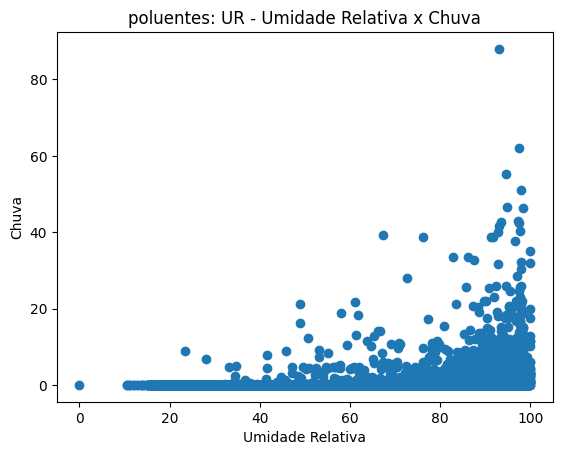

In [ ]:
# plotando o gráfico de Umidade Relativa x Chuva
plt.scatter(dadoarIR['UR'], dadoarIR['Chuva'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('poluentes: UR - Umidade Relativa x Chuva')
plt.xlabel('Umidade Relativa')
plt.ylabel('Chuva');